<a href="https://colab.research.google.com/github/wcj365/python-stats-dataviz/blob/master/top10states.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://data.ed.gov/dataset/9dc70e6b-8426-4d71-b9d5-70ce6094a3f4/resource/823ac095-bdfc-41b0-b508-4e8fc3110082/download/most-recent-cohorts-all-data-elements-1.csv

--2020-10-09 00:34:23--  https://data.ed.gov/dataset/9dc70e6b-8426-4d71-b9d5-70ce6094a3f4/resource/823ac095-bdfc-41b0-b508-4e8fc3110082/download/most-recent-cohorts-all-data-elements-1.csv
Resolving data.ed.gov (data.ed.gov)... 165.224.131.203, 2610:e8:9600:122::49
Connecting to data.ed.gov (data.ed.gov)|165.224.131.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145850166 (139M) [text/csv]
Saving to: ‘most-recent-cohorts-all-data-elements-1.csv’

most-recent-cohorts 100%[===================>] 139.09M  46.3MB/s    in 3.0s    

2020-10-09 00:34:26 (46.3 MB/s) - ‘most-recent-cohorts-all-data-elements-1.csv’ saved [145850166/145850166]



In [16]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
column_list = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]
df = pd.read_csv("most-recent-cohorts-all-data-elements-1.csv", usecols=column_list)
df.shape

(6806, 6)

In [5]:
df.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN
4755,443340,Williamson Christian College,TN,5,NaN,13525.0
104,105677,Roberto-Venn School of Luthiery,AZ,6,NaN,NaN
2578,202152,Columbiana County Career and Technical Center,OH,3,NaN,NaN
6624,24378010,Purdue University - Purdue Polytechnic Vincennes,IN,3,NaN,6342.0
5800,482538,DeVry University-Missouri,MO,4,0.6667,17395.0


In [14]:
by_state_counts = df.groupby(["STABBR"]).count().reset_index()
by_state_counts.head()

,STABBR,UNITID,INSTNM,REGION,ADM_RATE,TUITIONFEE_IN
0,AK,9,9,9,4,7
1,AL,87,87,87,26,67
2,AR,92,92,92,19,54
3,AS,1,1,1,0,1
4,AZ,117,117,117,17,49


<BarContainer object of 59 artists>

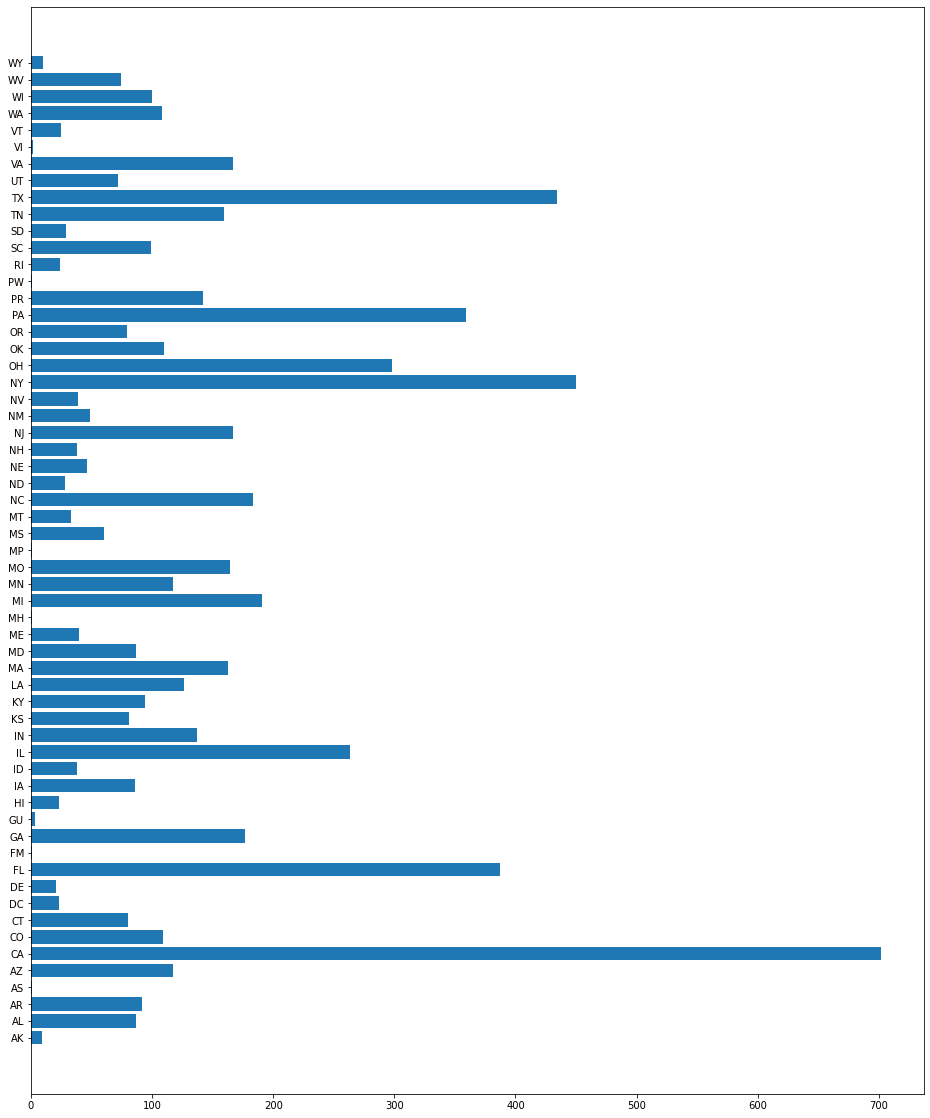

In [21]:
fig, ax = plt.subplots(figsize=(16,20))

ax.barh(y=by_state_counts["STABBR"], width=by_state_counts["UNITID"])

In [34]:
by_state_counts.sort_values("UNITID", ascending=False, inplace=True)
by_state_counts[:20]

,STABBR,UNITID,INSTNM,REGION,ADM_RATE,TUITIONFEE_IN
5,CA,702,702,702,142,308
39,NY,450,450,450,204,287
50,TX,434,434,434,83,204
10,FL,387,387,387,64,183
43,PA,359,359,359,164,208
40,OH,298,298,298,82,164
17,IL,263,263,263,68,135
26,MI,191,191,191,48,112
32,NC,183,183,183,60,135
12,GA,177,177,177,54,127


Text(0.5, 1.0, 'Top 10 States with most colleges')

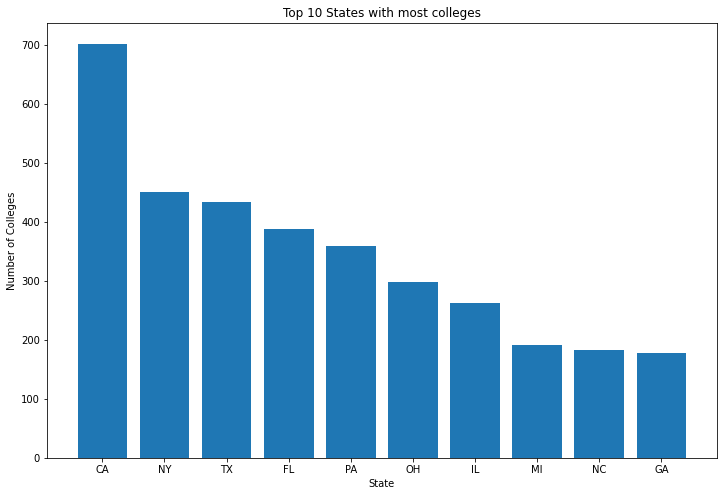

In [35]:
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(x=by_state_counts["STABBR"][0:10], height=by_state_counts["UNITID"][0:10])

ax.set_xlabel("State")
ax.set_ylabel("Number of Colleges")
ax.set_title("Top 10 States with most colleges")

In [36]:
fig.savefig("top10states.png")